## Import Libaries

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Read image

In [5]:
def read_image():
    path = "/media/rifat/STUDY/4-1/LAB/Image_Processing/image/paddy.jpeg"
    img = plt.imread(path)
    gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
    
    return img,gray

In [6]:
def shifting(img,p):
    r,c = img.shape
    img1 = np.copy(img)
    for i in range(r):
        for j in range (c):
            x = img1[i][j] + p
            if(x > 255):
                x = 255
            elif (x < 0):
                x = 0
            img1[i][j] = x
    return img1

In [14]:
def narrow_banding(img):
    r,c = img.shape
    img1 = np.copy(img)
    for i in range(r):
        for j in range (c):
            x = img1[i][j] 
            if(x > 150):
                #x = np.random.randint(100,150)
                x = 150
            elif (x < 100):
                x = 100
                #x = np.random.randint(100,150)
            img1[i][j] = x
    return img1

In [15]:
def histogram_shifting(gray):
    
    orginal_hist = cv.calcHist([gray],[0],None,[256],[0,256])
    
    right_Image = shifting(gray,50)
    right_hist = cv.calcHist([right_Image],[0],None,[256],[0,256])
    
    left_Image = shifting(gray,-50)
    left_hist = cv.calcHist([left_Image],[0],None,[256],[0,256])
    
    N_band = narrow_banding(gray)
    N_band_hist = cv.calcHist([N_band],[0],None,[256],[0,256])
    
    
    images = [gray,orginal_hist,right_Image,right_hist,left_Image,left_hist,N_band,N_band_hist]
    
    titles = ["Orginal","Original Histogram","Right Shift Image","Right Shift Histogram","Left Shift Image","Left Shift Histogram","Narrow Band","Narrow Band Histogram"]
    
    n = len(images)
    plt.figure(figsize = (30,30))
    for i in range(n):
        plt.subplot(4,2,i+1)
        r,c = images[i].shape
        if(c == 1):
            plt.plot(images[i])
        else:
            plt.imshow(images[i],cmap = 'gray')
        plt.title(titles[i])
    
    
    plt.show()

## Main

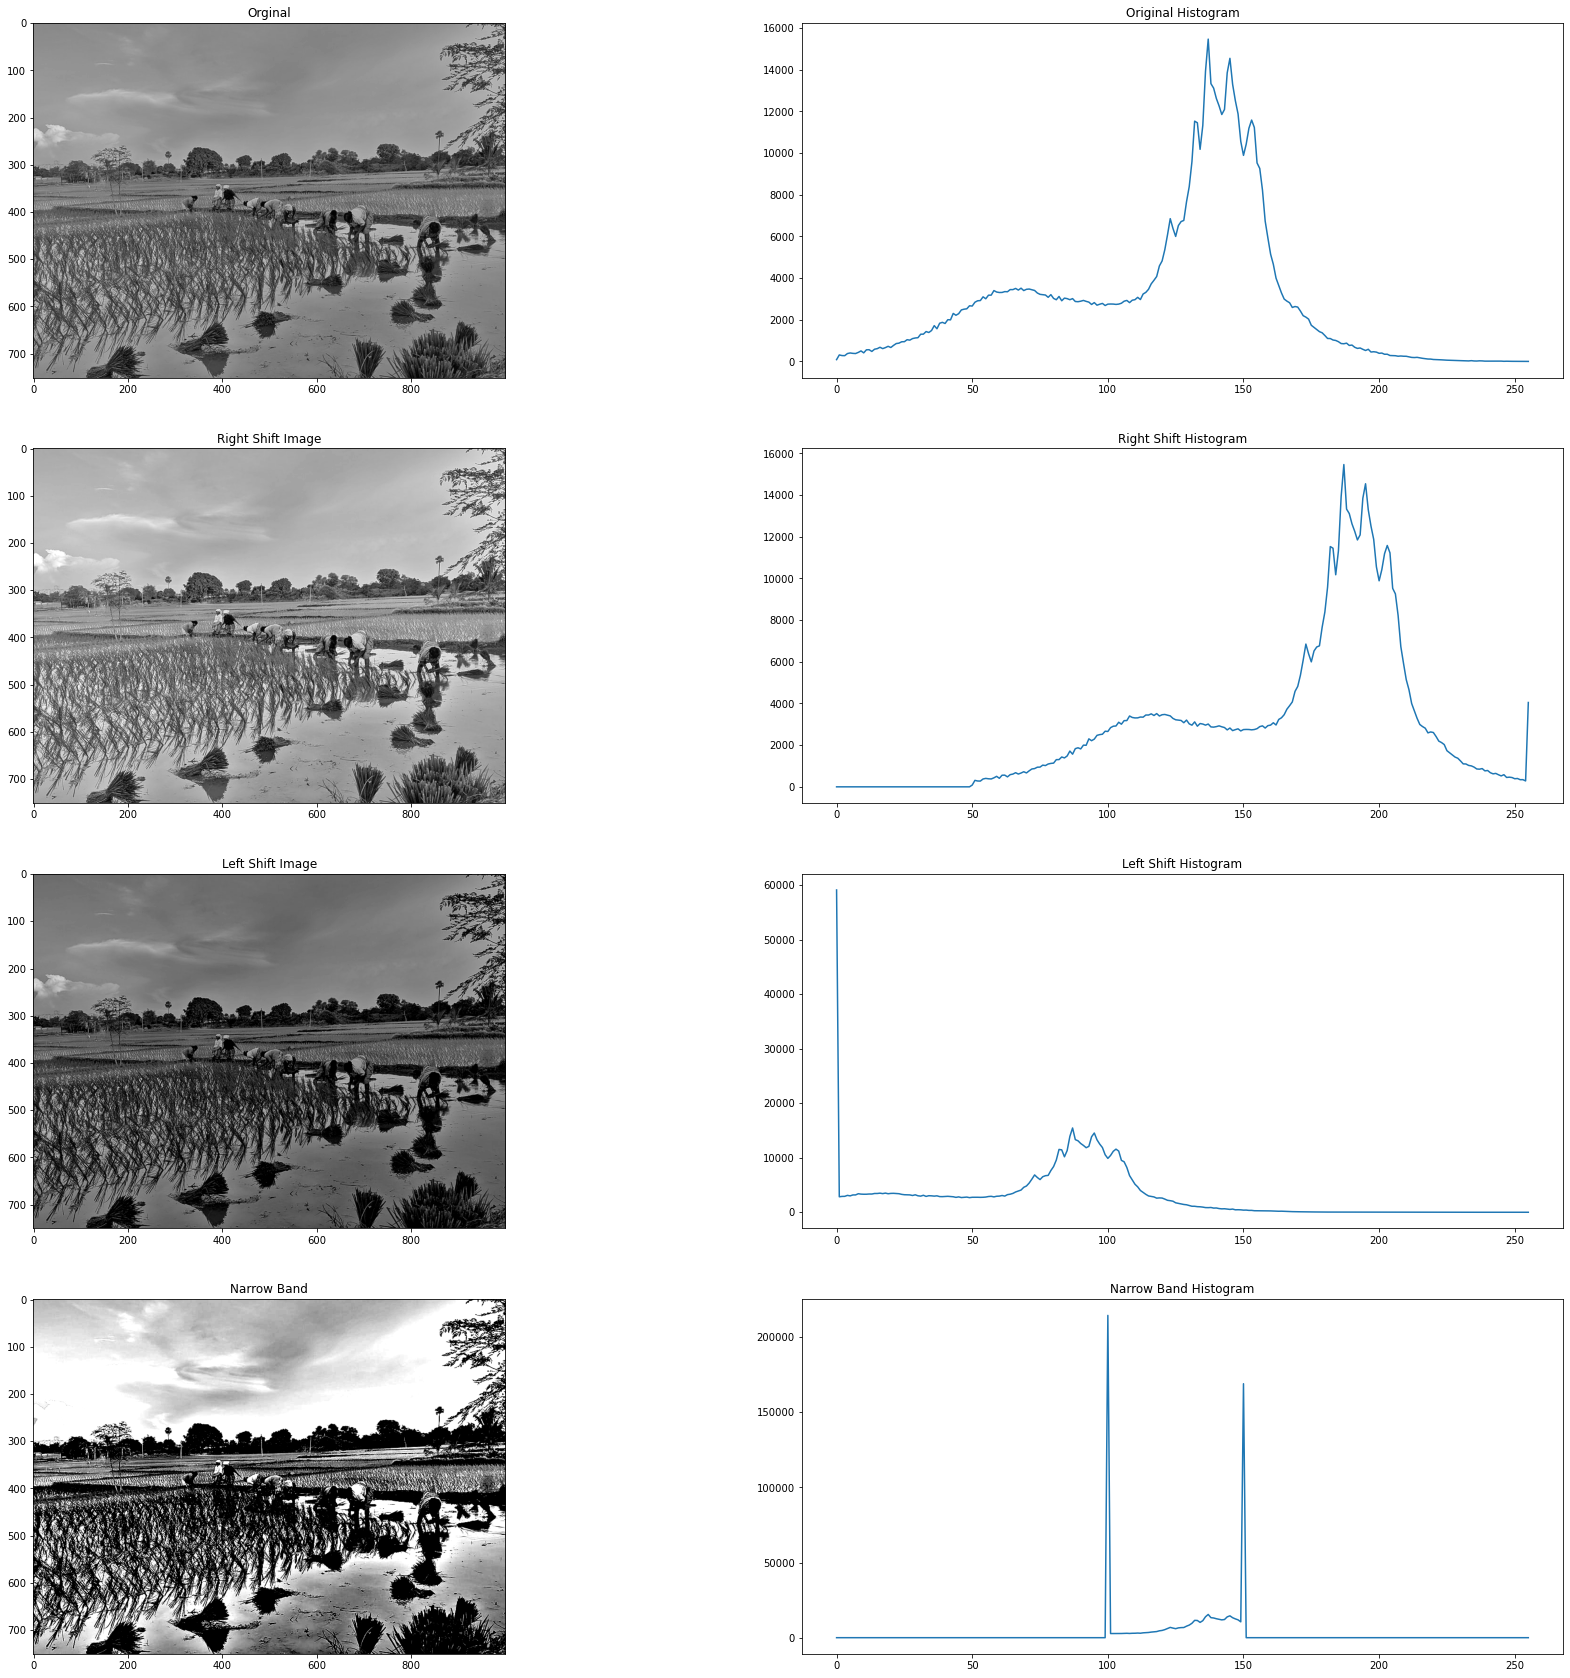

In [16]:
if __name__ == "__main__":
    img,gray = read_image()
    histogram_shifting(gray)
    
